### Stack overflow data for 2017 & 2018

The Stack Overflow Annual Developer Survey data provides comprehensive insights into various aspects of the global developer community. It includes information on programming languages, tools, technologies, job satisfaction, demographics, and more, collected through surveys conducted annually. This dataset serves as a valuable resource for understanding trends, preferences, and challenges within the software development industry.
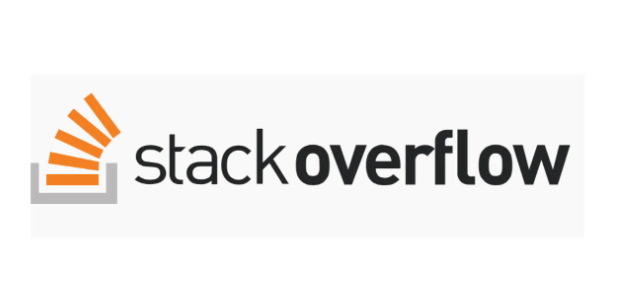


### * We are going to answer below Question by analysising the StackOverflow data*

Q1:- **What are the most common programming language used in India ?**

Q2:- **How does the programming languages used in professional settings correlate with the programming languages individuals aspire to learn?**

Q3:- **What are the most wanted programming languages in India?**

Analysis is performed using annual survey data and the country is selected 'India'

As India embraces emerging fields like Artificial Intelligence and Data Science, previously less-utilized programming languages are gaining traction. Common sentiments like "Python reigns as the top programming language". In this article, we'll delve into real data to ascertain the veracity of these claims regarding their adoption in India.

**Import required lib to use in the analysis**

In [219]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import os

**Changing the path**

In [220]:
os.chdir('D:\\udacity\\Data_Science_Blog_Post_master\\Data')

**Reading the files**

In [221]:
df_a = pd.read_csv('survey_results_public_2017.csv')
df_b = pd.read_csv('survey_results_public_2018.csv')

C:\Users\ankush.c\AppData\Local\Temp\ipykernel_12332\3691962742.py:2: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b = pd.read_csv('survey_results_public_2018.csv')


**Checking the samples of the data**

In [222]:
df_a.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
df_b.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


**Data Cleaning**

**I will follow the below steps of clean the data**

**1:- Filter the data sets for India**

**2:- Splitting the column of language**

**3:- Grouping the datasets**

**4:- Append the datasets**                        

**1:- Filter the datasets for india**

In [224]:
def filter_country(df, column_filter, country, columns):
    ''' This function is to filter a dataframe by india in country,
        returns the filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by India and selecting some columns.
India_2017 = filter_country(df_a, 'Country', 'India', ['HaveWorkedLanguage', 'WantWorkLanguage'])
India_2018 = filter_country(df_b, 'Country', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

**2:- splitting the column at ; as number of languages are in one columns**

In [225]:
def split_column(df, column):
    ''' Split columns as it is having more than 1 entries in column,
        returns a splited dataframe.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# Saperating the Dataframe. 
worked_language_2017 = split_column(India_2017, 'HaveWorkedLanguage')
language_to_work_with_2017 = split_column(India_2017, 'WantWorkLanguage')

worked_language_2018 = split_column(India_2018, 'LanguageWorkedWith')
language_to_work_with_2018 = split_column(India_2018, 'LanguageDesireNextYear')

In [226]:
def disarray(array_list):
    ''' This function is to flat the nested list,
        returns a modified list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# write the nested list objects.
list_worked_languages_2017 = disarray(worked_language_2017)
list_language_to_work_with__2017 = disarray(language_to_work_with_2017)

list_worked_languages_2018 = disarray(worked_language_2018)
list_language_to_work_with__2018 = disarray(language_to_work_with_2018)

**3:- Grouping the dataset**

In [227]:
def group_list(data_list, year):
    ''' Group by count of the above list,
        returns a result dictonary.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Creating a dictionary.
dict_worked_languages_2017 = group_list(list_worked_languages_2017, '2017')
dict_language_to_work_with__2017 = group_list(list_language_to_work_with__2017, '2017')

dict_worked_languages_2018 = group_list(list_worked_languages_2018, '2018')
dict_language_to_work_with__2018 = group_list(list_language_to_work_with__2018, '2018')

**4:- Appending the dataframes**

In [228]:
def create_dataframe(data_dicts):
    ''' Create two seperate dataframes and append them to create new dataframe,
        returns a new dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = pd.concat([df1, df2])
    
    return df

# Creating The new appended dataframe.
worked_languages = create_dataframe([dict_worked_languages_2017, dict_worked_languages_2018])
language_to_work_with_ = create_dataframe([dict_language_to_work_with__2017, dict_language_to_work_with__2018])

In [229]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Missing values treatment in out data**

we are going to drop those data points which are not having any values 

In [230]:
df.dropna(subset=['HaveWorkedLanguage', 'WantWorkLanguage'])


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51385,51386,Used to be a professional developer,"Yes, both",United Kingdom,No,Employed full-time,Master's degree,A business discipline,A few days each month,"1,000 to 4,999 employees",...,Somewhat agree,Female,High school,White or of European descent,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
51386,51387,Professional developer,"Yes, both",Romania,No,Employed full-time,Some college/university study without earning ...,Something else,It's complicated,100 to 499 employees,...,Somewhat agree,Male,High school,White or of European descent,Agree,Agree,Disagree,Somewhat agree,NaN,NaN
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,51389,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,Never,100 to 499 employees,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


Calculating the %ages

In [231]:

def percentage(df, column):
    ''' Scale the dataframe,
        returns the scaled date.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = pd.concat(series)
        
    return joined_series

# Calculating the percentage
worked_languages['Percentage'] = percentage(worked_languages, 'Year')
language_to_work_with_['Percentage'] = percentage(language_to_work_with_, 'Year')

In [232]:
# Get the top 5 languages
top_5_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(5)['Programming Language'].unique()
top_5_wanted_lang = language_to_work_with_.sort_values(by=['Percentage'], ascending=False).head(5)['Programming Language'].unique()

worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_5_worked_lang)]
wanted_lang_chart = language_to_work_with_[language_to_work_with_['Programming Language'].isin(top_5_worked_lang)]

### **Analyse the Data** ###

#### Q1. **What are the most used programming languages in India?**

To answer the above qestion we are going to plot the curve, which will be helpful for us to visualize and help us on the conclusion

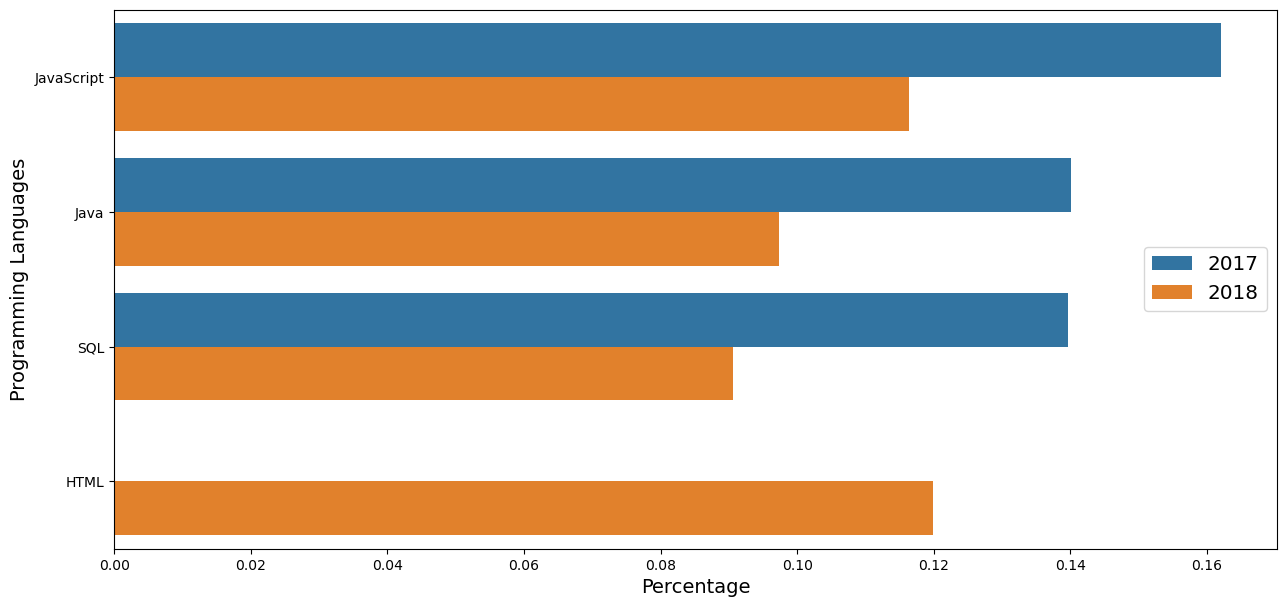

In [233]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')



### **Part 2 :-**
### How does the programming languages used in professional settings correlate with the programming languages individuals aspire to learn?

To Answer this question we are going to check how the working language are connect to the desired programming language.and then we will build a heat map to see the correlation between the languages and the plotted heatmap will help us to answer the above qeustion. The darker it will be


**Grouping the dataset to create a new dataframe**

In [234]:
rows = []
for itens in list(zip(worked_language_2018, language_to_work_with_2018)):
    for i in itens[0]:
        rows.append({
            'Worked_PL': i, 
            'Wanted_PL': Counter(itens[0])
        })
        
programming_language_transition = pd.DataFrame(rows).groupby('Worked_PL').agg({'Wanted_PL': 'sum'}).reset_index()

In [235]:
for row in programming_language_transition['Worked_PL']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_PL']).items()])
    for key, value in dict(row['Wanted_PL']).items():
         programming_language_transition[key].loc[index] = (value / total)

C:\Users\ankush.c\AppData\Local\Temp\ipykernel_12332\226408635.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  programming_language_transition[key].loc[index] = (value / total)
C:\Users\ankush.c\AppData\Local\Temp\ipykernel_12332\226408635.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.11753887309814412' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  programming_language_transition[key].loc[index] = (value / total)
C:\Users\ankush.c\AppData\Local\Temp\ipykernel_12332\226408635.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

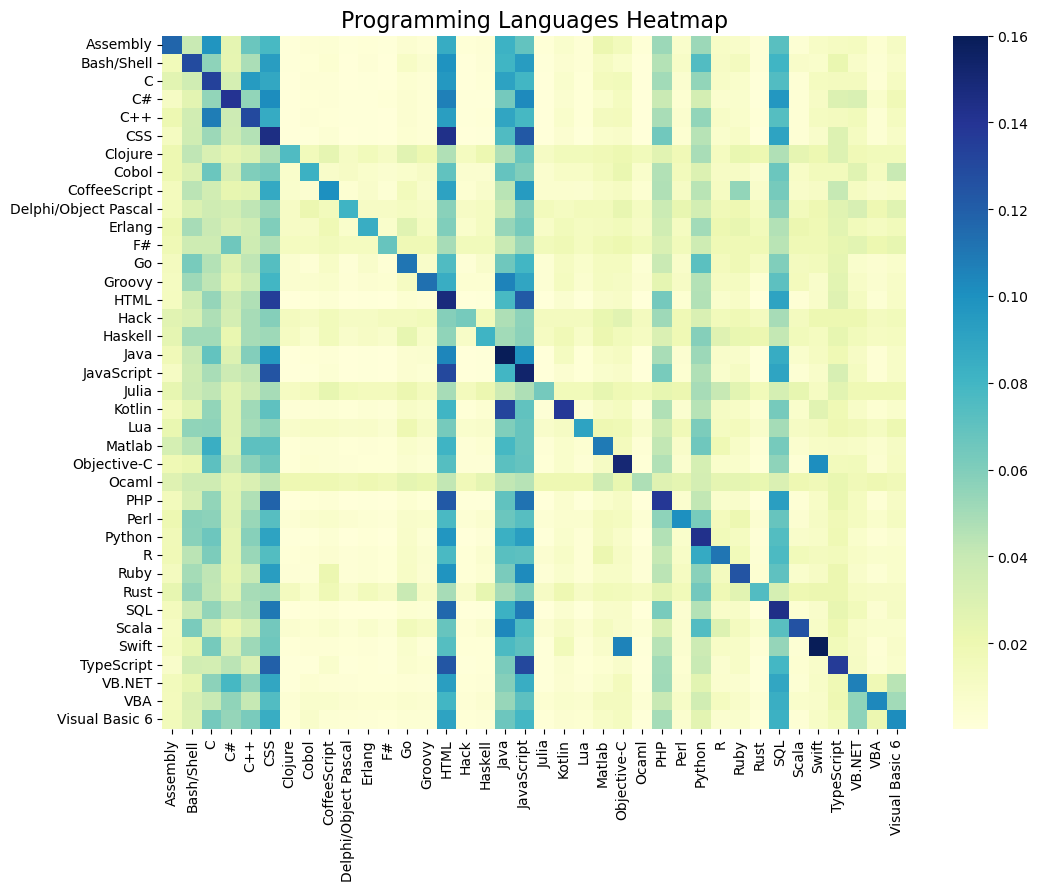

In [236]:

matrix = programming_language_transition.drop('Wanted_PL', axis=1)\
                                        .set_index('Worked_PL')

plt.figure(figsize=(12, 9))
sns.heatmap(matrix, cmap="YlGnBu")
plt.title('Programming Languages Heatmap', size = 16)
plt.ylabel('')
plt.show()

By seeing this figure we can have below insights

a)As indicated by the diagonal line, individuals who currently work with a programming language demonstrate a high likelihood of desiring to learn the same programming language.

b) Professionals working in a specific field like **Typescript** are willing to learn **HTML** & **JavaScript**.

### **Q3:-** **What are the most wanted programming languages in India?**

By seeing the raw data we can say that Python has experienced remarkable growth, drawing closer to other languages. This surge is likely due to its versatility and widespread usage in data-related fields. Additionally, many programming languages that feature prominently as the most used at work also appear in the ranking of the most desired programming languages. This indicates a strong desire among individuals to learn these languages.

**To answer this question we are going to draw a plot for most desired progamming language**

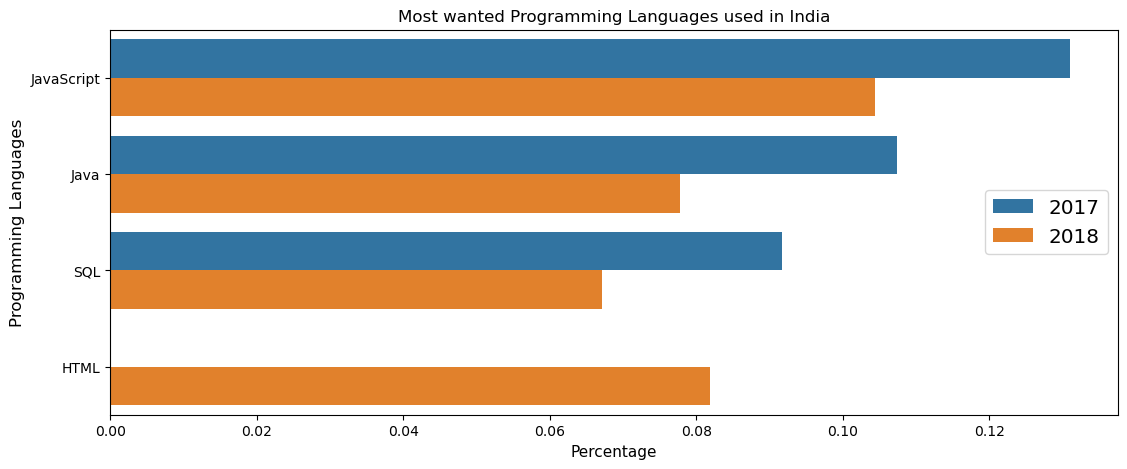

In [237]:
plt.figure(figsize=(13,5))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = wanted_lang_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in India', size = 12)
plt.xlabel("Percentage", fontsize = 11)
plt.ylabel("Programming Languages", fontsize = 12)
plt.legend(fontsize='x-large', title_fontsize='35')
plt.show()

By seeing the above graph we can say that

a) JavaScript, Java & SQL are most desired language in 2017 & 2018.

b) HTML is has gained popularity among the users which is to be learnt in 2018